In [44]:
# Dependencies
import requests
import json
from private_info.config import api_key, fromdate, todate
from private_info.opendata_config import token311, password, username
import pandas as pd
from datetime import datetime
import sys
# sys.path.append('/path/to/your/dev/environment/lib/python3.10/site-packages')
from sodapy import Socrata

In the following script we'll try to analize the following
NYC311 can provide you access to non-emergency City services and information about City government programs. NYC311 can help with a broad range of services, including things like homeless person assistance, pothole repair, or help understanding a property tax bill. over 500 services
which are the top 10 most popular report ploblems 311 receives (top 3 apartment mainrenance complaint, ilegal parking and noise from neighbor)
what's the time gap they take to solve problems
what location report more issues in nyc
What burough has the highest level of 311 calls
Were the 311 calls resolved (which burough has the highest resolution rate)
Which category of service is the best/worst

#Extracting NYC API Developers data from api-portal.nyc.gov

In [45]:
# URL for GET requests to retrieve vehicle data
url_calendar= f'https://api.nyc.gov/public/api/GetCalendar?fromdate={fromdate}&todate={todate}'
headers = {'Ocp-Apim-Subscription-Key': api_key}

In [46]:
# Print the response object to the console
response = requests.get(url_calendar, headers=headers)
print(response.status_code)

200


In [47]:
# Retrieving data and converting it into JSON
response_json =response.json()

In [48]:
# Pretty Print the output of the JSON
print(json.dumps(response_json, indent=4, sort_keys=True))

{
    "days": [
        {
            "items": [
                {
                    "details": "Alternate side parking and meters are suspended for New Year's Day.",
                    "exceptionName": "New Year's Day 2024",
                    "status": "SUSPENDED",
                    "type": "Alternate Side Parking"
                },
                {
                    "details": "Trash, recycling, and compost collections are suspended for New Year's Day.",
                    "exceptionName": "New Year's Day 2024",
                    "status": "SUSPENDED",
                    "type": "Collections"
                },
                {
                    "details": "Public schools are closed for Winter Recess. Students return Tuesday.",
                    "exceptionName": "Winter Recess Last Day 2024",
                    "status": "CLOSED",
                    "type": "Schools"
                }
            ],
            "today_id": "20240101"
        },
        {
       

In [181]:
#create a dataframe from json response 
api_df = response_json
api_df

{'days': [{'today_id': '20240101',
   'items': [{'exceptionName': "New Year's Day 2024",
     'details': "Alternate side parking and meters are suspended for New Year's Day.",
     'status': 'SUSPENDED',
     'type': 'Alternate Side Parking'},
    {'exceptionName': "New Year's Day 2024",
     'details': "Trash, recycling, and compost collections are suspended for New Year's Day.",
     'status': 'SUSPENDED',
     'type': 'Collections'},
    {'exceptionName': 'Winter Recess Last Day 2024',
     'details': 'Public schools are closed for Winter Recess. Students return Tuesday.',
     'status': 'CLOSED',
     'type': 'Schools'}]},
  {'today_id': '20240102',
   'items': [{'details': 'Alternate side parking and meters are in effect.',
     'status': 'IN EFFECT',
     'type': 'Alternate Side Parking'},
    {'exceptionName': "New Year's Day Delayed 1/2 - 1/3/24",
     'details': 'Trash, recycling, and compost collections are delayed due to the backlog from the recent holiday.',
     'status': 

#Extracting the the first trimester of 2024 from 311 service request dataset open data

In [51]:
# Define date range
start_date = datetime(2024, 1, 1).isoformat()  # January 1, 2023
end_date = datetime(2024, 4, 1).isoformat()  # January 1, 2024


# Example authenticated client (needed for non-public datasets):
client = Socrata(
    "data.cityofnewyork.us",
    token311,
    username= username,
    password= password,
    timeout=1000
)

# First 794354 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# Query dataset with date filter 
#in this case we se a limit of limit=794354 because that's the number of rows we need to get the first trimester, we cannot set it to default because it only retrive 1000 max.
results = client.get("erm2-nwe9", where=f"created_date between '{start_date}' and '{end_date}'", limit=794354)
print(len(results))
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

794354


In [52]:
#Displaying the 311 service request dataframe 
results_df

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,vehicle_type,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_segment,bridge_highway_direction,road_ramp,taxi_company_borough
0,60746805,2024-04-01T00:00:00.000,2024-04-01T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211,76 AINSLIE STREET,...,"{'latitude': '40.71256007953489', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60740007,2024-03-31T23:59:36.000,2024-04-01T05:20:38.000,DOT,Department of Transportation,Street Sign - Damaged,"No Parking, Standing, Stopping",Street,11205,920 KENT AVENUE,...,"{'latitude': '40.693075024696356', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60734332,2024-03-31T23:59:09.000,2024-04-01T09:12:45.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10454,313 EAST 140 STREET,...,"{'latitude': '40.81154285376075', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60738841,2024-03-31T23:58:47.000,2024-04-02T22:34:59.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10128,1670 YORK AVENUE,...,"{'latitude': '40.777070197706855', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60739109,2024-03-31T23:58:39.000,2024-04-02T15:08:50.000,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,10009,324 EAST 8 STREET,...,"{'latitude': '40.72501024136251', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794349,59887043,2024-01-01T00:00:20.000,2024-01-01T00:41:01.000,NYPD,New York City Police Department,Illegal Fireworks,N/A,Street/Sidewalk,11228,7223 FORT HAMILTON PARKWAY,...,"{'latitude': '40.62709413549678', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794350,59896272,2024-01-01T00:00:00.000,2024-01-02T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211,145 GRAND STREET EXTENSION,...,"{'latitude': '40.710675306389646', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794351,59899838,2024-01-01T00:00:00.000,2024-01-02T09:42:25.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10022,1069 1 AVENUE,...,"{'latitude': '40.759191822016476', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794352,59894610,2024-01-01T00:00:00.000,2024-01-02T09:46:32.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10304,7 NAVY PIER COURT,...,"{'latitude': '40.628827651071944', 'longitude'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Getting a brief summary of the results_df dataframe 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794354 entries, 0 to 794353
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   unique_key                      794354 non-null  object
 1   created_date                    794354 non-null  object
 2   closed_date                     774184 non-null  object
 3   agency                          794354 non-null  object
 4   agency_name                     794354 non-null  object
 5   complaint_type                  794354 non-null  object
 6   descriptor                      788994 non-null  object
 7   location_type                   695950 non-null  object
 8   incident_zip                    785089 non-null  object
 9   incident_address                762451 non-null  object
 10  street_name                     762428 non-null  object
 11  cross_street_1                  502948 non-null  object
 12  cross_street_2                

In [54]:
# Get the results_df columns
results_df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'vehicle_type', 'facility_type',
       'due_date', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_segment', 'bridge_highway_direction', 'road_ramp',
       'taxi_company_borough'],
      dtype='object')

In [55]:
#Assigning  location and location_subtype values to the location and location_subtype columns 
try:
    results_df[['location_', 'location_subtype']] = results_df['location_type'].str.split("/", n=1, expand=True)

except  ValueError:

    results_df['location_subtype'] = None 
results_df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_segment,bridge_highway_direction,road_ramp,taxi_company_borough,location_,location_subtype
0,60746805,2024-04-01T00:00:00.000,2024-04-01T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211,76 AINSLIE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurant,Bar/Deli/Bakery
1,60740007,2024-03-31T23:59:36.000,2024-04-01T05:20:38.000,DOT,Department of Transportation,Street Sign - Damaged,"No Parking, Standing, Stopping",Street,11205,920 KENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Street,None
2,60734332,2024-03-31T23:59:09.000,2024-04-01T09:12:45.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10454,313 EAST 140 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENTIAL BUILDING,None
3,60738841,2024-03-31T23:58:47.000,2024-04-02T22:34:59.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10128,1670 YORK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENTIAL BUILDING,None
4,60739109,2024-03-31T23:58:39.000,2024-04-02T15:08:50.000,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,10009,324 EAST 8 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Street,None


In [56]:

# Get the results_df columns
results_df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'vehicle_type', 'facility_type',
       'due_date', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_segment', 'bridge_highway_direction', 'road_ramp',
       'taxi_company_borough', 'location_', 'location_subtype'],
      dtype='object')

In [57]:
#Doucble check how it looks like and the delete the location_type column
results_df[['location_type', 'location_','location_subtype']]
results_df_ = results_df.drop(['location_type'], axis=1)
results_df_.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'vehicle_type', 'facility_type',
       'due_date', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_segment', 'bridge_highway_direction', 'road_ramp',
       'taxi_company_borough', 'location_', 'location_subtype'],
      dtype='object')

#Updating 311 service dataframe datatype

In [58]:
# Create a copy of the results_df_ dataframe 
copy_311service_request = results_df_.copy()
copy_311service_request.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_segment,bridge_highway_direction,road_ramp,taxi_company_borough,location_,location_subtype
0,60746805,2024-04-01T00:00:00.000,2024-04-01T00:00:01.000,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,11211,76 AINSLIE STREET,AINSLIE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurant,Bar/Deli/Bakery
1,60740007,2024-03-31T23:59:36.000,2024-04-01T05:20:38.000,DOT,Department of Transportation,Street Sign - Damaged,"No Parking, Standing, Stopping",11205,920 KENT AVENUE,KENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Street,None
2,60734332,2024-03-31T23:59:09.000,2024-04-01T09:12:45.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,10454,313 EAST 140 STREET,EAST 140 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENTIAL BUILDING,None
3,60738841,2024-03-31T23:58:47.000,2024-04-02T22:34:59.000,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,APARTMENT ONLY,10128,1670 YORK AVENUE,YORK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENTIAL BUILDING,None
4,60739109,2024-03-31T23:58:39.000,2024-04-02T15:08:50.000,DOT,Department of Transportation,Street Condition,Defective Hardware,10009,324 EAST 8 STREET,EAST 8 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Street,None


In [59]:
#Renaming the descriptor column
copy_311service_request = copy_311service_request.rename(columns={'descriptor': 'complaint_descriptor','location_': 'location_type'})

In [60]:
#reordering dataframe with location and location_subtype after descriptor 
# and we're also ignoring the 'agency_name' column since the metadata says that column is currenlty showing incorrect values.
nyc311_service_line = copy_311service_request[['unique_key', 'created_date', 'closed_date', 'agency',
       'complaint_type', 'complaint_descriptor','location_type','location_subtype', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'vehicle_type', 'facility_type',
       'due_date', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_segment', 'bridge_highway_direction', 'road_ramp',
       'taxi_company_borough']]

In [61]:
# # Convert the created_date, closed_date, due_date, and resolution_action_updated_date  columns to datetime format

# nyc311_service_line['created_date'] = pd.to_datetime(nyc311_service_line['created_date'])
# nyc311_service_line['closed_date'] = pd.to_datetime(nyc311_service_line['closed_date'])
# nyc311_service_line[ 'due_date'] = pd.to_datetime(nyc311_service_line['due_date'])
# nyc311_service_line['resolution_action_updated_date'] = pd.to_datetime(nyc311_service_line['resolution_action_updated_date'])

# #using loc function to avoid SettingWithCopyWarning

# Convert date columns to datetime format
date_columns = ['created_date', 'closed_date', 'due_date', 'resolution_action_updated_date']
for col in date_columns:
    nyc311_service_line.loc[:,col] = pd.to_datetime(nyc311_service_line[col])

In [62]:
# Convert latitude and longitude columns to float format
float_columns = ['latitude', 'longitude']
for float_column in float_columns:
    nyc311_service_line[float_column] = nyc311_service_line[float_column].astype(float)

# # Convert y_coordinate_state_plane and x_coordinate_state_plane columns to integer format
int_columns = ['y_coordinate_state_plane', 'x_coordinate_state_plane']
for int_column in int_columns:
    nyc311_service_line[int_column] = nyc311_service_line[int_column].fillna(0).astype(int)

#convert incident_zip and unique_key to integer columns 
integers_columns = [ 'incident_zip', 'unique_key'] # here we have the columns without Nan values 
for integer_columns in integers_columns:
    nyc311_service_line[integer_columns] = nyc311_service_line[integer_columns].fillna(0).astype(int)

C:\Users\amand\AppData\Local\Temp\ipykernel_13720\4210539024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc311_service_line[float_column] = nyc311_service_line[float_column].astype(float)
C:\Users\amand\AppData\Local\Temp\ipykernel_13720\4210539024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc311_service_line[float_column] = nyc311_service_line[float_column].astype(float)
C:\Users\amand\AppData\Local\Temp\ipykernel_13720\4210539024.py:9: SettingWithCopyWarning: 
A value is trying to be se

In [63]:
# Checking the datatypes
nyc311_service_line.dtypes

unique_key                          int32
created_date                       object
closed_date                        object
agency                             object
complaint_type                     object
complaint_descriptor               object
location_type                      object
location_subtype                   object
incident_zip                        int32
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
intersection_street_1              object
intersection_street_2              object
address_type                       object
city                               object
landmark                           object
status                             object
resolution_description             object
resolution_action_updated_date     object
community_board                    object
bbl                                object
borough                           

In [64]:

nyc311_service_line.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'complaint_type',
       'complaint_descriptor', 'location_type', 'location_subtype',
       'incident_zip', 'incident_address', 'street_name', 'cross_street_1',
       'cross_street_2', 'intersection_street_1', 'intersection_street_2',
       'address_type', 'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'vehicle_type', 'facility_type', 'due_date',
       'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_segment', 'bridge_highway_direction', 'road_ramp',
       'taxi_company_borough'],
      dtype='object')

In [65]:

nyc311_service_line.head()

,unique_key,created_date,closed_date,agency,complaint_type,complaint_descriptor,location_type,location_subtype,incident_zip,incident_address,...,longitude,vehicle_type,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_segment,bridge_highway_direction,road_ramp,taxi_company_borough
0,60746805,2024-04-01 00:00:00,2024-04-01 00:00:01,DOHMH,Food Poisoning,1 or 2,Restaurant,Bar/Deli/Bakery,11211,76 AINSLIE STREET,...,-73.951899,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,60740007,2024-03-31 23:59:36,2024-04-01 05:20:38,DOT,Street Sign - Damaged,"No Parking, Standing, Stopping",Street,None,11205,920 KENT AVENUE,...,-73.959093,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,60734332,2024-03-31 23:59:09,2024-04-01 09:12:45,HPD,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,None,10454,313 EAST 140 STREET,...,-73.924611,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,60738841,2024-03-31 23:58:47,2024-04-02 22:34:59,HPD,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,None,10128,1670 YORK AVENUE,...,-73.946274,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,60739109,2024-03-31 23:58:39,2024-04-02 15:08:50,DOT,Street Condition,Defective Hardware,Street,None,10009,324 EAST 8 STREET,...,-73.979179,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:

# Create the nyc311 location dataframe 
nyc311_location =nyc311_service_line[['unique_key', 'borough', 'latitude', 'longitude', 'x_coordinate_state_plane', 'y_coordinate_state_plane','due_date']]
nyc311_location.tail()

,unique_key,borough,latitude,longitude,x_coordinate_state_plane,y_coordinate_state_plane,due_date
794349,59887043,BROOKLYN,40.627094,-74.014497,980226,167744,NaT
794350,59896272,BROOKLYN,40.710675,-73.954050,996989,198198,NaT
794351,59899838,MANHATTAN,40.759192,-73.962290,994697,215873,NaT
794352,59894610,STATEN ISLAND,40.628828,-74.074387,963602,168384,NaT
794353,59898042,BRONX,40.845340,-73.865594,1021437,247286,NaT


In [195]:
#Create borough dataframe
nyc311_borough =nyc311_service_line[['unique_key', 'borough', 'latitude', 'longitude', 'x_coordinate_state_plane', 'y_coordinate_state_plane','complaint_type','complaint_descriptor']]
nyc311_borough.tail()

,unique_key,borough,latitude,longitude,x_coordinate_state_plane,y_coordinate_state_plane,complaint_type,complaint_descriptor,created_date
794349,59887043,BROOKLYN,40.627094,-74.014497,980226,167744,Illegal Fireworks,N/A,2024-01-01 00:00:20
794350,59896272,BROOKLYN,40.710675,-73.954050,996989,198198,Food Poisoning,1 or 2,2024-01-01 00:00:00
794351,59899838,MANHATTAN,40.759192,-73.962290,994697,215873,Food Poisoning,1 or 2,2024-01-01 00:00:00
794352,59894610,STATEN ISLAND,40.628828,-74.074387,963602,168384,Food Poisoning,1 or 2,2024-01-01 00:00:00
794353,59898042,BRONX,40.845340,-73.865594,1021437,247286,Food Poisoning,1 or 2,2024-01-01 00:00:00


In [68]:
# Counts Instances of each Borough Grouped by Complaint
borough_complaint_counts = nyc311_service_line.groupby("complaint_type")["borough"].value_counts()
# Display
borough_complaint_counts

complaint_type           borough      
AHV Inspection Unit      MANHATTAN          12
                         BROOKLYN            5
                         BRONX               3
APPLIANCE                BRONX            1967
                         BROOKLYN         1576
                                          ... 
Wood Pile Remaining      STATEN ISLAND      18
                         BRONX              12
                         MANHATTAN           1
X-Ray Machine/Equipment  BRONX               1
                         QUEENS              1
Name: count, Length: 822, dtype: int64

In [83]:
#Unique value count of borough
unique_agency = nyc311_service_line["agency"].value_counts()
unique_agency

agency
NYPD     316884
HPD      228164
DSNY      65662
DOT       53678
DEP       38572
DOB       24812
DPR       19684
DOHMH     19168
TLC        8869
DHS        7190
EDC        7006
DCWP       4256
DOE         370
OTI          39
Name: count, dtype: int64

In [109]:
agency_df =nyc311_service_line['agency'].value_counts()
agency_df

agency
NYPD     316884
HPD      228164
DSNY      65662
DOT       53678
DEP       38572
DOB       24812
DPR       19684
DOHMH     19168
TLC        8869
DHS        7190
EDC        7006
DCWP       4256
DOE         370
OTI          39
Name: count, dtype: int64

In [94]:
agency_complaint_counts = nyc311_service_line.groupby("agency")["complaint_type"].value_counts()
agency_complaint_counts_df=pd.DataFrame(agency_complaint_counts)
agency_complaint_counts_df

count
agency complaint_type                  
DCWP   Consumer Complaint          4256
DEP    Noise                      13345
       Water System               10600
       Sewer                       7277
       Lead                        3090
...                                 ...
TLC    Found Property                13
       Green Taxi Report             13
       FHV Licensee Complaint         4
       Dispatched Taxi Complaint      4
       Taxi Licensee Complaint        2

[186 rows x 1 columns]

In [99]:
agency_per_complaint = nyc311_service_line[['complaint_type', 'agency']]
agency_per_complaint

omplaint_counts = nyc311_service_line[nyc311_service_line["borough"].isin(["BROOKLYN", "STATEN ISLAND"])].groupby("borough").size().reset_index(name="Total Complaints")

,complaint_type,agency
0,Food Poisoning,DOHMH
1,Street Sign - Damaged,DOT
2,HEAT/HOT WATER,HPD
3,HEAT/HOT WATER,HPD
4,Street Condition,DOT
...,...,...
794349,Illegal Fireworks,NYPD
794350,Food Poisoning,DOHMH
794351,Food Poisoning,DOHMH
794352,Food Poisoning,DOHMH


In [149]:
nypd_complaints = agency_per_complaint.query('agency == "NYPD"').groupby('complaint_type').size().reset_index(name='NYPD')
hpd_complaints = agency_per_complaint.query('agency == "HPD"').groupby('complaint_type').size().reset_index(name='HPD')
dsny_complaints = agency_per_complaint.query('agency == "DSNY"').groupby('complaint_type').size().reset_index(name='DSNY')

agency_complaints = nypd_complaints.merge(hpd_complaints, on='complaint_type', how='outer').merge(dsny_complaints, on='complaint_type', how='outer').fillna(0)
agency_complaints

,complaint_type,NYPD,HPD,DSNY
0,Abandoned Vehicle,17625.0,0.0,0.0
1,Animal-Abuse,2066.0,0.0,0.0
2,Bike/Roller/Skate Chronic,3000.0,0.0,0.0
3,Blocked Driveway,43067.0,0.0,0.0
4,Disorderly Youth,44.0,0.0,0.0
...,...,...,...,...
57,Sanitation Worker or Vehicle Complaint,0.0,0.0,580.0
58,Seasonal Collection,0.0,0.0,140.0
59,Snow or Ice,0.0,0.0,4388.0
60,Street Sweeping Complaint,0.0,0.0,1644.0


In [150]:
nypd_data = agency_per_complaint[agency_per_complaint['agency'] == 'NYPD']
nypd_data

,complaint_type,agency
5,Noise - Residential,NYPD
6,Noise - Commercial,NYPD
7,Illegal Parking,NYPD
8,Noise - Street/Sidewalk,NYPD
9,Illegal Parking,NYPD
...,...,...
794345,Noise - Street/Sidewalk,NYPD
794346,Illegal Fireworks,NYPD
794347,Noise - Residential,NYPD
794348,Noise - Residential,NYPD


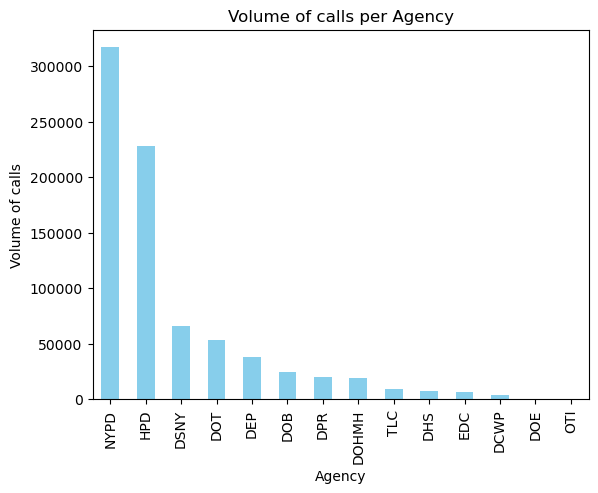

In [151]:
import matplotlib.pyplot as plt

agency_df.plot(x='agency', y='complaint_type', kind='bar', color='skyblue')


plt.xlabel('Agency')
plt.ylabel('Volume of calls')
plt.title('Volume of calls per Agency')

plt.show()

In [152]:
unique_agency_name = results_df_["agency_name"].value_counts()
unique_agency_name

agency_name
New York City Police Department                       316884
Department of Housing Preservation and Development    228164
Department of Sanitation                               65662
Department of Transportation                           53678
Department of Environmental Protection                 38572
Department of Buildings                                24812
Department of Parks and Recreation                     19684
Department of Health and Mental Hygiene                19168
Taxi and Limousine Commission                           8869
Department of Homeless Services                         7190
Economic Development Corporation                        7006
Department of Consumer and Worker Protection            4256
Department of Education                                  370
Office of Technology and Innovation                       39
Name: count, dtype: int64

In [146]:
nypd_complaints = agency_per_complaint.query('agency == "NYPD"').groupby('complaint_type').size().reset_index(name='NYPD')
nypd_complaints = nypd_complaints.sort_values(by=['NYPD', 'complaint_type'])
nypd_complaints = nypd_complaints.reset_index(drop=True)
print(nypd_complaints)


                 complaint_type    NYPD
0                      Squeegee       8
1         Posting Advertisement      21
2              Disorderly Youth      44
3           Urinating in Public     130
4      Noise - House of Worship     171
5                      Graffiti     271
6                      Drinking     516
7                  Noise - Park     584
8             Illegal Fireworks     600
9                       Traffic     945
10                  Panhandling    1846
11                 Animal-Abuse    2066
12    Bike/Roller/Skate Chronic    3000
13                Drug Activity    4422
14                   Encampment    4909
15  Non-Emergency Police Matter    5098
16              Noise - Vehicle    9093
17           Noise - Commercial   15165
18      Noise - Street/Sidewalk   15722
19            Abandoned Vehicle   17625
20             Blocked Driveway   43067
21          Noise - Residential   68498
22              Illegal Parking  123083


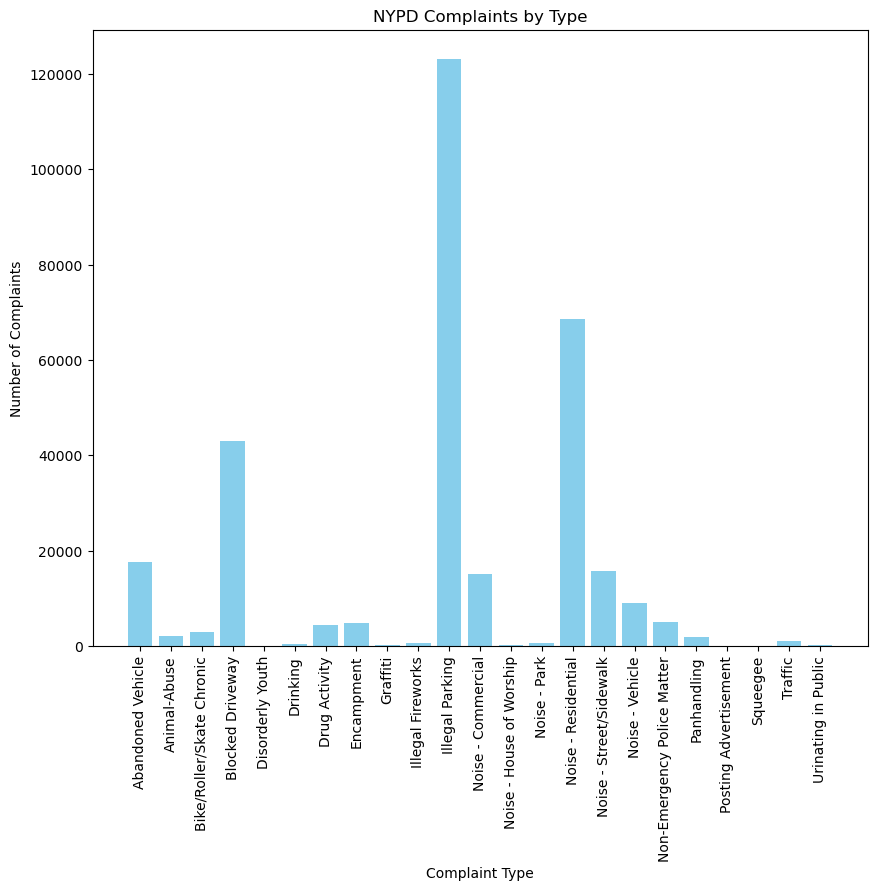

In [169]:
# Create a histogram for NYPD
plt.figure(figsize=(10,8))
plt.bar(nypd_complaints['complaint_type'], nypd_complaints['NYPD'], color='skyblue')
plt.title('NYPD Complaints by Type')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

In [199]:
# Create borough dataframe
nypd_date = nyc311_service_line[(nyc311_service_line['agency'] == 'NYPD')]
nypd_date = nypd_date[['agency', 'complaint_type', 'created_date']]
nypd_date

,agency,complaint_type,created_date
5,NYPD,Noise - Residential,2024-03-31 23:58:32
6,NYPD,Noise - Commercial,2024-03-31 23:58:22
7,NYPD,Illegal Parking,2024-03-31 23:58:21
8,NYPD,Noise - Street/Sidewalk,2024-03-31 23:58:12
9,NYPD,Illegal Parking,2024-03-31 23:57:53
...,...,...,...
794345,NYPD,Noise - Street/Sidewalk,2024-01-01 00:00:48
794346,NYPD,Illegal Fireworks,2024-01-01 00:00:46
794347,NYPD,Noise - Residential,2024-01-01 00:00:43
794348,NYPD,Noise - Residential,2024-01-01 00:00:20


In [215]:
nypd_date['created_date'] = pd.to_datetime(nypd_date['created_date'])
nypd_date['created_date'] = nypd_date['created_date'].dt.date
illegal_parking_counts = nypd_date[nypd_date['complaint_type'] == 'Illegal Parking'].groupby('created_date').size().reset_index(name='count')
illegal_parking_counts

#I am trying to calculate the total count per day of each complaint for NYPD so I can create a linegraph which is less busy... Not quite done yet.

,created_date,count
0,2024-01-01,1167
1,2024-01-02,1410
2,2024-01-03,1468
3,2024-01-04,1519
4,2024-01-05,1497
...,...,...
86,2024-03-27,1459
87,2024-03-28,1179
88,2024-03-29,1407
89,2024-03-30,1265


In [212]:
nypd_date_grouped = nypd_date.groupby(['created_date', 'complaint_type']).size().reset_index(name='count')
nypd_date_grouped

,created_date,complaint_type,count
0,2024-01-01 00:00:20,Illegal Fireworks,1
1,2024-01-01 00:00:20,Noise - Residential,1
2,2024-01-01 00:00:43,Noise - Residential,1
3,2024-01-01 00:00:46,Illegal Fireworks,1
4,2024-01-01 00:00:48,Noise - Street/Sidewalk,1
...,...,...,...
315067,2024-03-31 23:57:53,Illegal Parking,1
315068,2024-03-31 23:58:12,Noise - Street/Sidewalk,1
315069,2024-03-31 23:58:21,Illegal Parking,1
315070,2024-03-31 23:58:22,Noise - Commercial,1


In [147]:
hpd_complaints = agency_per_complaint.query('agency == "HPD"').groupby('complaint_type').size().reset_index(name='HPD')
hpd_complaints = hpd_complaints.sort_values(by=['HPD', 'complaint_type'])
hpd_complaints = hpd_complaints.reset_index(drop=True)
print(hpd_complaints)

          complaint_type     HPD
0       OUTSIDE BUILDING     394
1               ELEVATOR     401
2                 SAFETY    3333
3              APPLIANCE    5353
4        FLOORING/STAIRS    7137
5               ELECTRIC    7222
6                GENERAL    8257
7            DOOR/WINDOW   12755
8             WATER LEAK   13933
9          PAINT/PLASTER   17331
10              PLUMBING   17406
11  UNSANITARY CONDITION   28192
12        HEAT/HOT WATER  106450


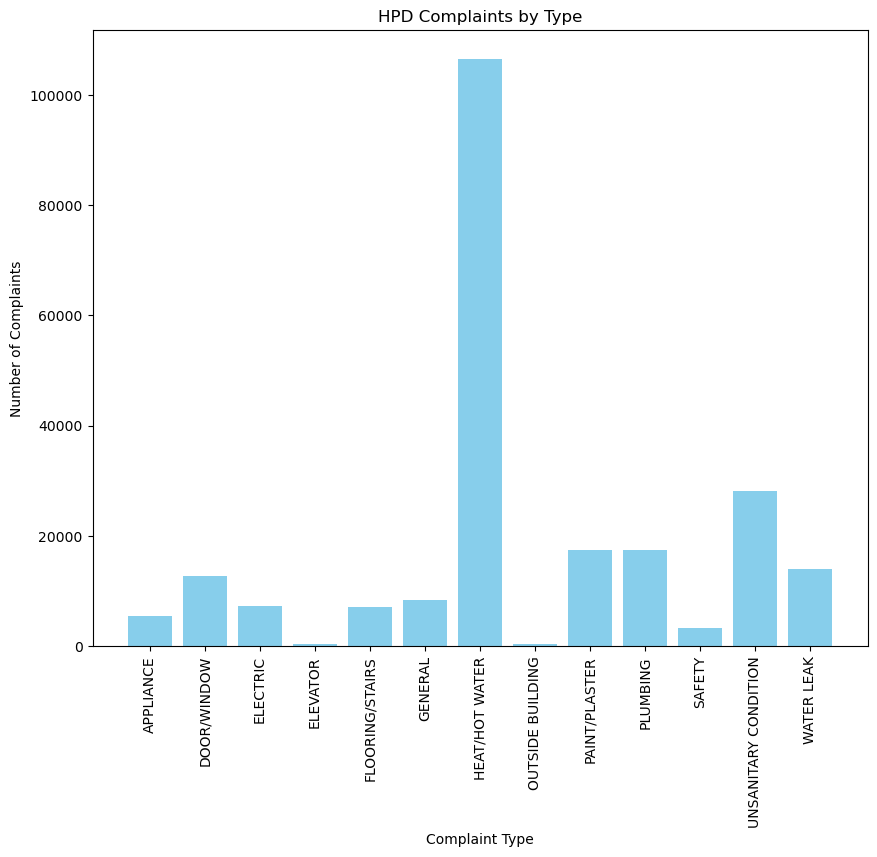

In [175]:
# Create a histogram for HPD
plt.figure(figsize=(10,8))
plt.bar(hpd_complaints['complaint_type'], hpd_complaints['HPD'], color='skyblue')
plt.title('HPD Complaints by Type')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

In [148]:
dsny_complaints = agency_per_complaint.query('agency == "DSNY"').groupby('complaint_type').size().reset_index(name='DSNY')
dsny_complaints = dsny_complaints.sort_values(by=['DSNY', 'complaint_type'])
dsny_complaints = dsny_complaints.reset_index(drop=True)
print(dsny_complaints)

                            complaint_type   DSNY
0                            DSNY Internal      1
1                         Oil or Gas Spill      2
2                           Incorrect Data      5
3           Institution Disposal Complaint      9
4                       Retailer Complaint      9
5               Recycling Basket Complaint     10
6                           Adopt-A-Basket     14
7                      Seasonal Collection    140
8                  Litter Basket Complaint    207
9                            Lot Condition    264
10                      Dumpster Complaint    378
11                          Abandoned Bike    533
12  Sanitation Worker or Vehicle Complaint    580
13                   Litter Basket Request    777
14                         Illegal Posting    908
15           Commercial Disposal Complaint   1018
16               Street Sweeping Complaint   1644
17                             Dead Animal   2014
18          Residential Disposal Complaint   2912


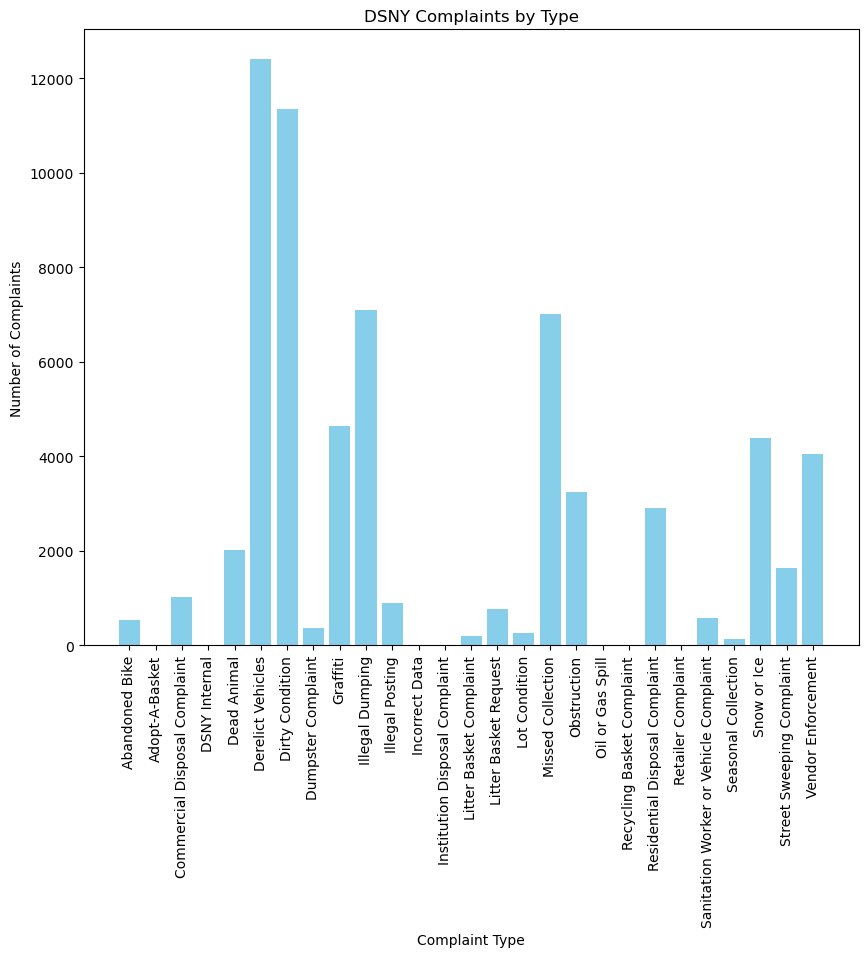

In [177]:
# Create a histogram for DSNY
plt.figure(figsize=(10,8))
plt.bar(dsny_complaints['complaint_type'], dsny_complaints['DSNY'], color='skyblue')
plt.title('DSNY Complaints by Type')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

In [189]:
# Filter and group the data
dsny_complaints = agency_per_complaint.query('agency == "DSNY"').groupby('complaint_type')['created_date'].count().reset_index(name='count')
dsny_complaints = dsny_complaints.sort_values(by=['count', 'complaint_type'], ascending=[False, True])
dsny_complaints = dsny_complaints.reset_index(drop=True)

print(dsny_complaints)

KeyError: 'Column not found: created_date'

In [182]:
#Trash time
#create a empty list to store data
rows = []
# Loop through the data and extract information
for day in api_df['days']:
    today_id = day['today_id']
    for type in day['items']:
        row = {'today_id': today_id}
        row.update(type)
        rows.append(row)
trash_cleaned_df = pd.DataFrame(rows)
#display dataframe 
trash_cleaned_df

,today_id,exceptionName,details,status,type
0,20240101,New Year's Day 2024,Alternate side parking and meters are suspende...,SUSPENDED,Alternate Side Parking
1,20240101,New Year's Day 2024,"Trash, recycling, and compost collections are ...",SUSPENDED,Collections
2,20240101,Winter Recess Last Day 2024,Public schools are closed for Winter Recess. S...,CLOSED,Schools
3,20240102,NaN,Alternate side parking and meters are in effect.,IN EFFECT,Alternate Side Parking
4,20240102,New Year's Day Delayed 1/2 - 1/3/24,"Trash, recycling, and compost collections are ...",DELAYED,Collections
...,...,...,...,...,...
130,20240213,Lincoln's Birthday and Snow Delayed 2/13 - 2/1...,"Trash, recycling, and compost collections are ...",DELAYED,Collections
131,20240213,Snow 2/13/2024,All public school students are scheduled for r...,REMOTE ONLY,Schools
132,20240214,Ash Wednesday 2024,Alternate side parking is suspended for Ash We...,SUSPENDED,Alternate Side Parking
133,20240214,Lincoln's Birthday and Snow Delayed 2/13 - 2/1...,"Trash, recycling, and compost collections are ...",DELAYED,Collections


In [185]:
collections_list = []

# Iterating over each 'day' in the 'days' column of api_df
for day in api_df['days']:
    # Iterating over each 'item' in the 'items' list of the current 'day'
    for item in day['items']:
        # Appending a dictionary to collections_list for each 'item'
        collections_list.append({
            'today_id': day['today_id'],  # Storing 'today_id' from the current 'day'
            'status': item['status'],     # Storing 'status' from the current 'item'
            'type': item['type']          # Storing 'type' from the current 'item'
        })

# Creating a DataFrame using collections_list
types_df = pd.DataFrame(collections_list)

# Filtering rows in types_df where 'type' column equals 'Collections'
specific_type = 'Collections'
trash_filtered_df = types_df[types_df['type'] == specific_type]

# Displaying the first few rows of the filtered DataFrame
trash_filtered_df

,today_id,status,type
1,20240101,SUSPENDED,Collections
4,20240102,DELAYED,Collections
7,20240103,DELAYED,Collections
10,20240104,ON SCHEDULE,Collections
13,20240105,ON SCHEDULE,Collections
16,20240106,ON SCHEDULE,Collections
19,20240107,NOT IN EFFECT,Collections
22,20240108,ON SCHEDULE,Collections
25,20240109,ON SCHEDULE,Collections
28,20240110,ON SCHEDULE,Collections


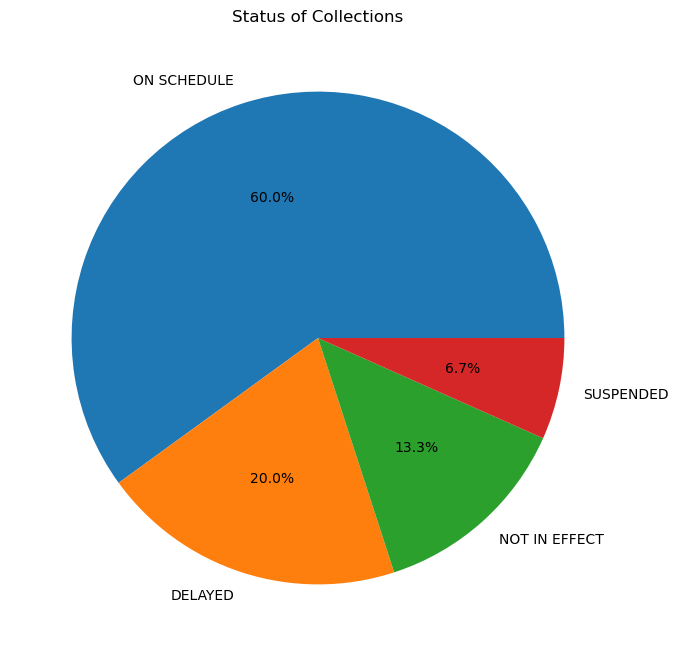

In [186]:
# Counting the occurrences of each status
status_counts = trash_filtered_df['status'].value_counts()

# Creating a pie chart
plt.figure(figsize=(10,8))
plt.pie(status_counts, labels = status_counts.index, autopct='%1.1f%%')
plt.title('Status of Collections')
plt.show()